In [1]:
from pymongo import MongoClient
import pandas as pd

client = MongoClient('mongodb://localhost:27017/')
db = client.UniV3

swaps = db.swaps
users = db.users


In [2]:
swaps_count = swaps.count_documents({})
users_count = users.count_documents({})

print('swaps_count', swaps_count)
print('users_count', users_count)
print("averange swaps num per user:", swaps_count / users_count)

swaps_count 506407
users_count 142795
averange swaps num per user: 3.5463916803809656


In [3]:
aggregate_swaps_num = users.aggregate([{ "$project": { "count": { "$size": "$swaps" }} }])
df = pd.DataFrame(list(aggregate_swaps_num))
print(df.head())


                                          _id  count
0  0x8cb50c2ab3c9108ac5d5199c9397f26eb9642253     21
1  0x421125ca608a35458b2c99da39cd55b70ba202a4   1454
2  0xa9126e05455f66eb20bb0ffd8cf66a32a3fcf5b5      7
3  0xa8ebe1eed676d5bfeb7f7b5933625281489af8a3     12
4  0x8bbcb4d259b0f52e4bcf32210cae0bc91a677cdb      8


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def getCounts(arr, bins):
    segments = pd.cut(arr, bins, right=False)
    counts = pd.value_counts(segments, sort=False)
    return counts

def drawBars(x):
    plt.figure(figsize=(18, 8), layout='constrained')
    plt.axes(yscale="log")
    plt.bar(x.index.astype(str), x)  # Plot some data on the (implicit) axes.
    plt.xlabel('swaps num bins')
    plt.ylabel('swaps num')
    plt.title("swaps num distribution")
    plt.legend()

In [33]:
counts_0 = getCounts(df['count'].to_list(), [0, 5, 10, 20, 50, 100, 200, 10000])
print(counts_0.head(counts_0.shape[0]))

[0, 5)          127371
[5, 10)           9760
[10, 20)          3693
[20, 50)          1319
[50, 100)          327
[100, 200)         148
[200, 10000)       177
dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


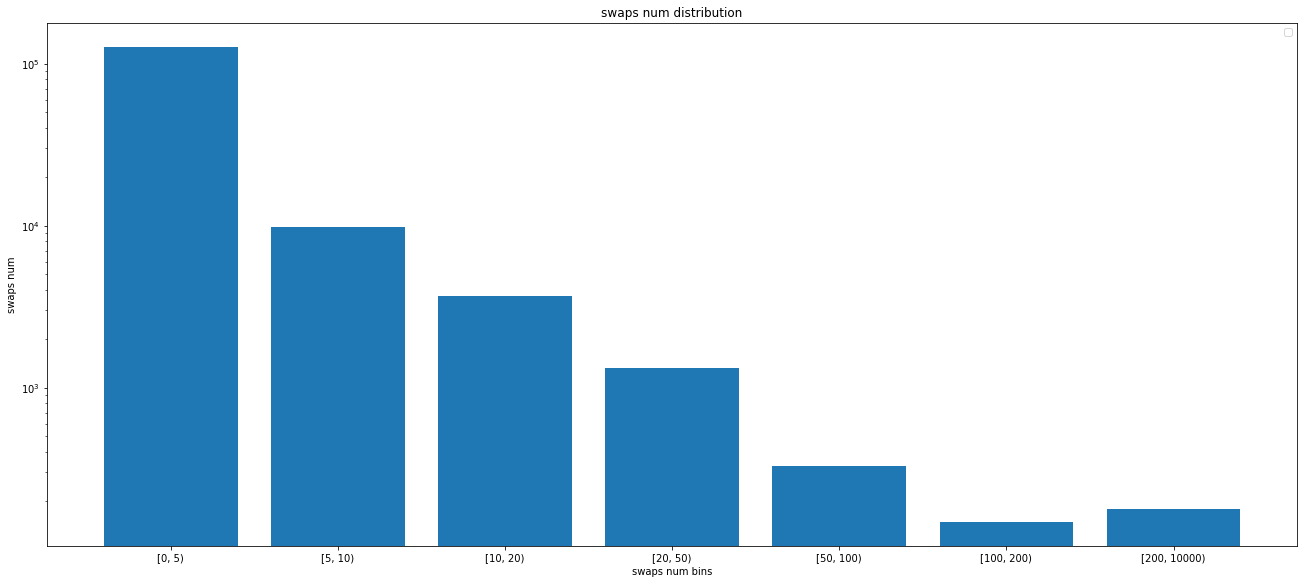

In [34]:
'''
whole user's swap num distribution, it's very uneven.
'''
drawBars(counts_0)

Now we only consider users those swaps num < 100

In [35]:
bins = []
for i in range(0,101,5):
    bins.append(i)
print(bins)
counts_1 = getCounts(df['count'].to_list(), bins)
print(counts_1.head(counts_1.shape[0]))

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
[0, 5)       127371
[5, 10)        9760
[10, 15)       2622
[15, 20)       1071
[20, 25)        527
[25, 30)        292
[30, 35)        197
[35, 40)        138
[40, 45)         99
[45, 50)         66
[50, 55)         50
[55, 60)         53
[60, 65)         45
[65, 70)         29
[70, 75)         29
[75, 80)         21
[80, 85)         31
[85, 90)         33
[90, 95)         16
[95, 100)        20
dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


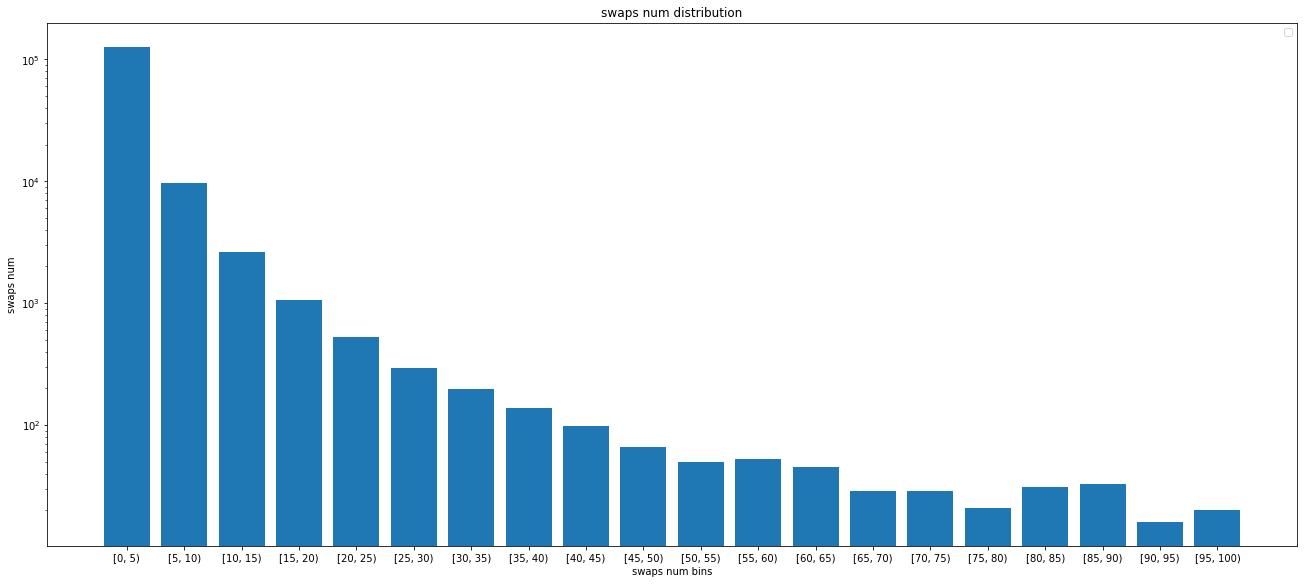

In [36]:
'''
whole user's swap num distribution, it's very uneven.
'''
drawBars(counts_1)